In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [2]:
# Lấy địa chỉ thư mục chứa dữ liệu đã được reformatted
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'../../data/reformatted_data')

# Tạo df
df = pd.read_csv(f'{folder_path}/non_pre_processed_data.csv')
df.to_csv(f'{folder_path}/EDA.csv')
df['ar3'] = df['ar3'].apply(lambda x: round(x,2))
 


In [3]:
X = df[df.columns[:-2]]
y = df['drop_out']

# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled],axis=1)
df

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,drop_out
0,1900006098,1,23,1.200000,2.200000,1.600000,0.400000,34.500000,12.000000,0.000000,1
1,1900007549,0,23,1.600000,1.100000,2.000000,3.800000,100.000000,48.000000,76.000000,1
2,1900007763,1,23,6.000000,7.300000,5.200000,7.400000,0.000000,0.700000,7.200000,0
3,1900007784,1,23,8.200000,7.600000,6.500000,6.600000,7.700000,2.200000,16.100000,0
4,1900008106,1,23,3.700000,7.600000,3.200000,7.200000,7.000000,0.000000,3.800000,0
...,...,...,...,...,...,...,...,...,...,...,...
627,2000001163,0,22,1.925845,0.400748,1.418726,1.763296,58.584203,48.220907,58.670354,1
628,2094368657,1,21,3.319598,0.377450,2.037987,1.584563,7.931526,6.685216,3.409387,1
629,2000002180,0,22,0.711139,1.145889,2.202916,1.548805,95.562894,85.400561,92.294448,1
630,2000004451,0,22,0.318710,0.224519,1.187099,2.700642,65.045257,65.612970,39.722731,1


In [4]:
df.columns

Index(['student_id', 'gender', 'age', 'gpa1', 'gpa2', 'gpa3', 'gpa4', 'ar1',
       'ar2', 'ar3', 'drop_out'],
      dtype='object')

### Biến phân loại:
+ 'student_id'
+ 'gender'
+ 'drop_out' (thôi học)
### Biến số:
+ 'age'
+ 'gpa1', 'gpa2', 'gpa3', 'gpa4' (điểm trung bình học kỳ 1, 2, 3, 4)
+ 'ar1', 'ar2', 'ar3', 'ar4' (tỉ lệ vắng học học kỳ 1, 2, 3, 4)


# Kiểm tra dữ liệu thiếu

In [5]:
df.isnull().sum()

student_id    0
gender        0
age           0
gpa1          0
gpa2          0
gpa3          0
gpa4          0
ar1           0
ar2           0
ar3           0
drop_out      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  632 non-null    int64  
 1   gender      632 non-null    int64  
 2   age         632 non-null    int64  
 3   gpa1        632 non-null    float64
 4   gpa2        632 non-null    float64
 5   gpa3        632 non-null    float64
 6   gpa4        632 non-null    float64
 7   ar1         632 non-null    float64
 8   ar2         632 non-null    float64
 9   ar3         632 non-null    float64
 10  drop_out    632 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 54.4 KB


## Kiểm tra dữ liệu trùng

In [7]:
duplicated_id_pairs = df.duplicated(subset=['student_id'], keep=False)
duplicated_id_pairs[duplicated_id_pairs==True]
if duplicated_id_pairs.all():
    print('Có cặp id bị trùng')
else:
    print('Không có student_id bị trùng')

Không có student_id bị trùng


## Thống kê mô tả

In [8]:
df.iloc[:,2:-1].describe()

,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,21.351266,4.121229,4.200144,4.252965,4.508206,34.490332,26.377727,27.966471
std,1.128804,2.943653,3.390845,2.780336,2.748190,31.319480,26.183082,28.171061
min,20.000000,0.300000,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000
25%,20.000000,1.599695,1.001647,1.696146,2.029529,8.350000,1.700000,4.975000
50%,21.000000,3.278017,3.002824,3.273719,3.400000,18.950000,17.250000,15.535000
75%,22.000000,6.700000,7.600000,6.900000,7.000000,58.035517,48.922693,48.984766
max,26.000000,10.000000,10.000000,9.900000,10.000000,100.000000,90.000000,95.000000


## Chuyển đổi kiểu dữ liệu

In [9]:
df.dtypes

student_id      int64
gender          int64
age             int64
gpa1          float64
gpa2          float64
gpa3          float64
gpa4          float64
ar1           float64
ar2           float64
ar3           float64
drop_out        int64
dtype: object

In [10]:
df['student_id'] = df['student_id'].astype(str)
df.dtypes

student_id     object
gender          int64
age             int64
gpa1          float64
gpa2          float64
gpa3          float64
gpa4          float64
ar1           float64
ar2           float64
ar3           float64
drop_out        int64
dtype: object

## Kiếm tra biến phân loại student_id

In [11]:
df['student_id'] = df['student_id'].astype(str)
check = df['student_id'].str.isalpha()
check[check]

Series([], Name: student_id, dtype: bool)

## Kiếm tra biến phân loại gender

In [12]:
check = df['gender'].astype(str).str.isalpha()
check[check]

Series([], Name: gender, dtype: bool)

In [13]:
df['gender'].unique()

array([1, 0], dtype=int64)

## Kiêm tra biến phân loại age

In [14]:
check = df['age'].astype(str).str.isalpha()
print(df['age'].dtype)
df['age'] = df['age'].astype('int8')
print("Kiểu dữ liệu sau khi chuyển đổi: ",df['age'].dtype)
check[check]

int64
Kiểu dữ liệu sau khi chuyển đổi:  int8


Series([], Name: age, dtype: bool)

In [15]:
df['drop_out'].unique()

array([1, 0], dtype=int64)

## Mã hóa biến phân loại student_id bằng phương pháp LabelEncoder

Phương pháp label encoder
+ Chuyển đổi các biến phân loại thành các số nguyên duy nhất.
+ Label Encoder thích hợp cho các biến phân loại không có mối quan hệ thứ bậc giữa các giá trị, nghĩa là không có thứ tự hoặc mức độ quan trọng giữa các giá trị

In [16]:
le = LabelEncoder()
df['student_id_'] = le.fit_transform(df['student_id'])

In [17]:
df  

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,drop_out,student_id_
0,1900006098,1,23,1.200000,2.200000,1.600000,0.400000,34.500000,12.000000,0.000000,1,0
1,1900007549,0,23,1.600000,1.100000,2.000000,3.800000,100.000000,48.000000,76.000000,1,15
2,1900007763,1,23,6.000000,7.300000,5.200000,7.400000,0.000000,0.700000,7.200000,0,16
3,1900007784,1,23,8.200000,7.600000,6.500000,6.600000,7.700000,2.200000,16.100000,0,17
4,1900008106,1,23,3.700000,7.600000,3.200000,7.200000,7.000000,0.000000,3.800000,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
627,2000001163,0,22,1.925845,0.400748,1.418726,1.763296,58.584203,48.220907,58.670354,1,177
628,2094368657,1,21,3.319598,0.377450,2.037987,1.584563,7.931526,6.685216,3.409387,1,329
629,2000002180,0,22,0.711139,1.145889,2.202916,1.548805,95.562894,85.400561,92.294448,1,194
630,2000004451,0,22,0.318710,0.224519,1.187099,2.700642,65.045257,65.612970,39.722731,1,251


## Chuẩn hóa dữ liệu (z score)

Mục tiêu: Đưa các biến về cùng 1 thang đo

Giữ cho phân phối của chúng có trung bình xấp xỉ 0 và độ lệch chuẩn xấp xỉ 1, (giảm biến động của dữ liệu   )

In [18]:
# Chuyển đổi các biến về cùng 1 thang đo bằng z score
features = df.iloc[:, 1:].columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
data = df.iloc[:, 3:]
data

,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,drop_out,student_id_
0,-0.993169,-0.590333,-0.954944,-1.496061,0.000309,-0.549558,-0.993524,1.0,-1.730887
1,-0.857175,-0.914993,-0.810963,-0.257903,2.093316,0.826465,1.706417,1.0,-1.648540
2,0.638750,0.914908,0.340889,1.053088,-1.102114,-0.981476,-0.737740,-1.0,-1.643050
3,1.386713,1.003452,0.808829,0.761756,-0.856066,-0.924142,-0.421563,-1.0,-1.637560
4,-0.143211,1.003452,-0.379019,0.980255,-0.878434,-1.008232,-0.858527,-1.0,-1.632070
...,...,...,...,...,...,...,...,...,...
627,-0.746394,-1.121374,-1.020195,-0.999598,0.769903,0.834909,1.090772,1.0,-0.759187
628,-0.272541,-1.128251,-0.797289,-1.064686,-0.848668,-0.752704,-0.872404,1.0,0.075268
629,-1.159373,-0.901449,-0.737922,-1.077708,1.951531,2.256021,2.285286,1.0,-0.665859
630,-1.292792,-1.173387,-1.103570,-0.658250,0.976361,1.499683,0.417647,1.0,-0.352939


## Giảm chiều dữ liệu. (PCA)

In [19]:
## Danh sách các features
nb_features = data.shape[1]
features = data.columns[:-2]
print(nb_features)
print('Các features:', ', '.join(features))

9
Các features: gpa1, gpa2, gpa3, gpa4, ar1, ar2, ar3


In [20]:
pca = PCA().fit(data)  
## Phương sai trên từng chiều (phương sai đo lường mức độ phân tán của các điểm dữ liệu quanh giá trị trung bình)
print(pca.explained_variance_.flatten())

[6.7067102  0.77426743 0.6537449  0.2581366  0.22316603 0.19436485
 0.10285197 0.06628765 0.03473346]


## Chọn k
k là eig vectors có eig values lớn nhất.

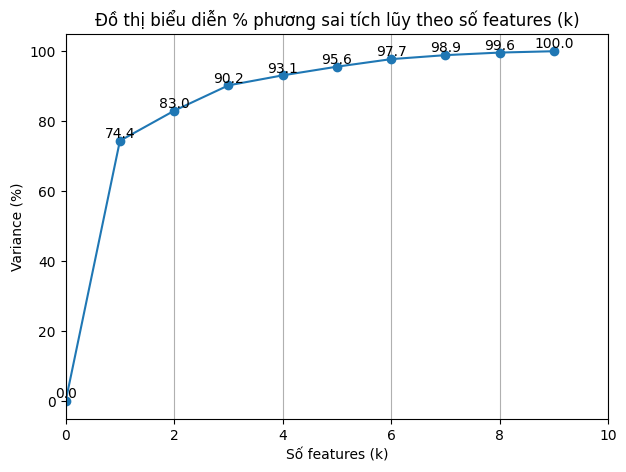

In [21]:
# Các điểm dữ liệu
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points[-nb_features-1:])//0.01/100  # Corrected calculation of y_i

plt.figure(figsize = (7, 5))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')  
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()


In [22]:
## Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(data)

    #Tính tổng phương sai tích lũy
    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, ': phương sai tích lũy ~ %.1f%%' %newVar,
          '--> tăng ~ %.1f%%' %(newVar - var))
    var = newVar

   * k =  1 : phương sai tích lũy ~ 74.4% --> tăng ~ 74.4%
   * k =  2 : phương sai tích lũy ~ 83.0% --> tăng ~ 8.6%
   * k =  3 : phương sai tích lũy ~ 90.2% --> tăng ~ 7.3%
   * k =  4 : phương sai tích lũy ~ 93.1% --> tăng ~ 2.9%
   * k =  5 : phương sai tích lũy ~ 95.6% --> tăng ~ 2.5%
   * k =  6 : phương sai tích lũy ~ 97.7% --> tăng ~ 2.2%
   * k =  7 : phương sai tích lũy ~ 98.9% --> tăng ~ 1.1%
   * k =  8 : phương sai tích lũy ~ 99.6% --> tăng ~ 0.7%
   * k =  9 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.4%


### Nhận xét: 
Khi tăng từ k=1 đến k=2, phương sai tích lũy tăng khoảng 11.9%, đây là một sự tăng đáng kể.

Tuy nhiên, sau khi tăng từ k=2 đến k=3, mức tăng giảm xuống còn 10.6%, và sau đó giảm dần theo mỗi bước tăng k.

In [23]:
A = data.values
pca = PCA(n_components = 2)
pca.fit(A)

PCA(n_components=2)

In [24]:
## Hiển thị kết quả tóm tắt
#  components_: array, shape (n_components, n_features)
#               Các thành phần chính trong không gian features,
#               biểu thị các hướng của phương sai tối đa trong dữ liệu
#  explained_variance_ : array, shape (n_components,)
#               Lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.components:\n', pca.components_)
print('PCA.shape:', pca.components_.shape)
print('PCA.explained variance:', pca.explained_variance_)
print('PCA.explained variance shape:', pca.explained_variance_.shape)

PCA.components:
 [[-0.33717227 -0.35163368 -0.33661164 -0.33150131  0.35209645  0.33681522
   0.32872336  0.37177826 -0.2361643 ]
 [-0.0197952  -0.20959475 -0.18510131 -0.24636782 -0.32419329 -0.44344294
  -0.46467793  0.15789236 -0.56402135]]
PCA.shape: (2, 9)
PCA.explained variance: [6.7067102  0.77426743]
PCA.explained variance shape: (2,)


In [25]:
## Phép chiếu dữ liệu vào không gian MỚI (tọa độ mới)
P = pca.transform(A)
P.shape

(632, 2)

In [26]:
PC_name = ['PC 1', 'PC 2']
df_pca = pd.DataFrame(P, columns = PC_name)
df_pca['student_id'] = df['student_id']

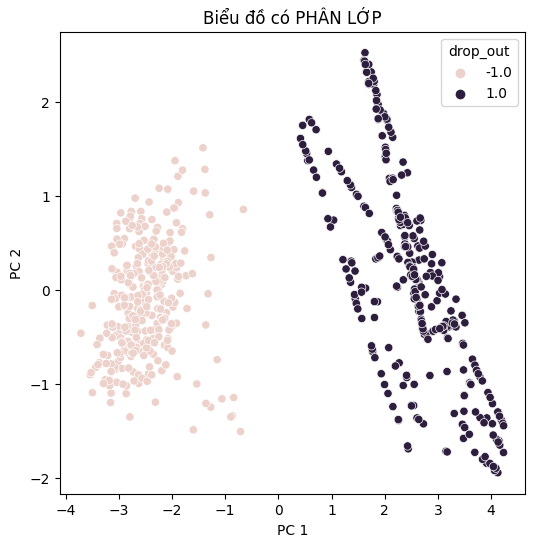

In [27]:
## Biểu diễn trực quan dữ liệu sau khi áp dụng PCA
df_pca['drop_out'] = df['drop_out']

plt.figure(figsize = (6, 6))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = df_pca, hue='drop_out')
plt.show()

In [28]:
# Dữ liệu phân bố thành 2 vùng:
# Vùng 1: dữ liệu tập trùng trong khoảng (4, 6) -> tập trung các điểm dữ liệu sinh viên còn học tiếp
# Vùng 2: dữ liệu phân bố đồ đều trong khoảng (5.5, 15) -> tập trung các điểm dữ liệu là sinh viên thôi học 
# -> Nếu x cao, y thấp -> sinh viên có khả năng thôi học.


In [29]:
df_pca

,PC 1,PC 2,student_id,drop_out
0,1.628808,2.528149,1900006098,1.0
1,3.306692,-0.327964,1900007549,1.0
2,-1.945816,1.377211,1900007763,-1.0
3,-2.081498,1.073796,1900007784,-1.0
4,-1.419375,1.514615,1900008106,-1.0
...,...,...,...,...
627,2.782677,0.144318,2000001163,1.0
628,0.624834,1.781494,2094368657,1.0
629,4.040790,-1.547569,2000002180,1.0
630,2.879491,-0.180697,2000004451,1.0


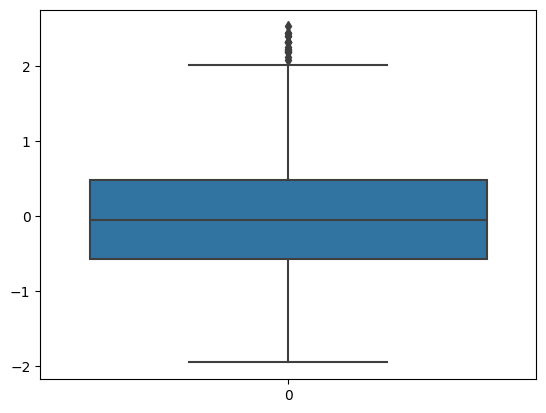

In [30]:
sns.boxplot(df_pca.iloc[:,1])
plt.show()

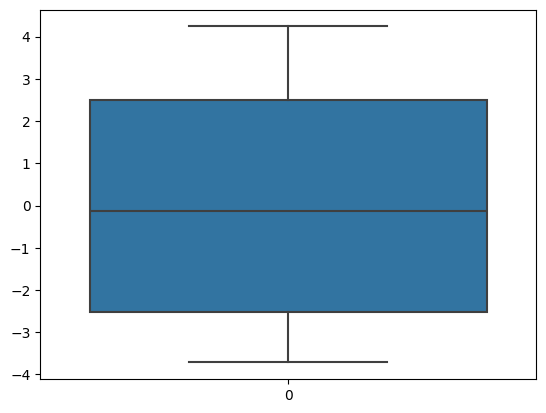

In [31]:
sns.boxplot(df_pca.iloc[:,0])
plt.show()

In [32]:
def calculate_iqr(df, col):
    Q1 = df[f'{col}'].quantile(0.25)
    Q2 = df[f'{col}'].quantile(0.50)
    Q3 = df[f'{col}'].quantile(0.75)
    return ((Q3-Q1),Q1, Q2, Q3) 

In [33]:
UW = calculate_iqr(df_pca, 'PC 2')[3] + 1.5*calculate_iqr(df_pca, 'PC 2')[0]
outlier = df_pca[df_pca['PC 2'] > UW].sort_values(by='PC 2')
df_pca.loc[outlier.index,'PC 2'] = df_pca['PC 2'].quantile(0.75)
df_pca

,PC 1,PC 2,student_id,drop_out
0,1.628808,0.488245,1900006098,1.0
1,3.306692,-0.327964,1900007549,1.0
2,-1.945816,1.377211,1900007763,-1.0
3,-2.081498,1.073796,1900007784,-1.0
4,-1.419375,1.514615,1900008106,-1.0
...,...,...,...,...
627,2.782677,0.144318,2000001163,1.0
628,0.624834,1.781494,2094368657,1.0
629,4.040790,-1.547569,2000002180,1.0
630,2.879491,-0.180697,2000004451,1.0


In [34]:
UW = calculate_iqr(df_pca, 'PC 1')[3] + 1.5*calculate_iqr(df_pca, 'PC 1')[0]
outlier = df_pca[df_pca['PC 1'] > UW].sort_values(by='PC 1')
df_pca.loc[outlier.index,'PC 1'] = df_pca['PC 1'].quantile(0.75)
df_pca

,PC 1,PC 2,student_id,drop_out
0,1.628808,0.488245,1900006098,1.0
1,3.306692,-0.327964,1900007549,1.0
2,-1.945816,1.377211,1900007763,-1.0
3,-2.081498,1.073796,1900007784,-1.0
4,-1.419375,1.514615,1900008106,-1.0
...,...,...,...,...
627,2.782677,0.144318,2000001163,1.0
628,0.624834,1.781494,2094368657,1.0
629,4.040790,-1.547569,2000002180,1.0
630,2.879491,-0.180697,2000004451,1.0


#### Tính độ lệch của phân phối dữ liệu.
+ Nếu dữ liệu có độ méo lệch bằng 0, đó có nghĩa là dữ liệu hoàn toàn đối xứng. 

+ Nếu độ méo lệch lớn hơn 0, dữ liệu lệch về phía bên trái của trục x (trái đối với phân phối Gaussian)

+ Nếu nhỏ hơn 0, dữ liệu lệch về phía bên phải của trục x.

c:\Program Files\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


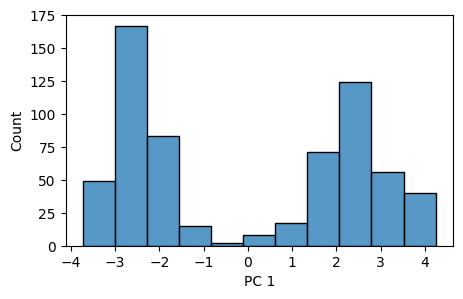

In [35]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_pca['PC 1'])
plt.show()

c:\Program Files\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


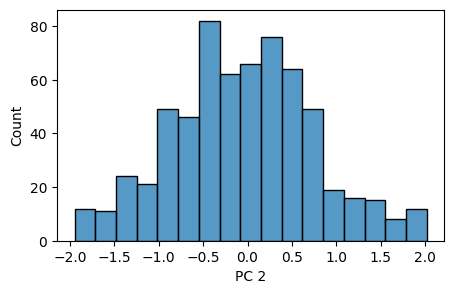

In [36]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_pca['PC 2'])
plt.show()

In [37]:
#  tính độ xiên của tần số

print(df_pca['PC 1'].mean(), df_pca['PC 1'].median())
print(df_pca['PC 2'].mean(), df_pca['PC 2'].median())

print('PC 1',df_pca['PC 1'].skew())
print('PC 2',df_pca['PC 2'].skew())

-1.7988423690129118e-16 -0.12164333849867326
-0.048591119623416036 -0.05082970469566779
PC 1 0.10001269527621956
PC 2 0.09373456931201683


In [38]:
# mean > median
# độ xiên > 0
# Có số lượng nhỏ ở PC 1 và PC 2 có khả năng tiếp tục học 
# 2 biểu đồ lệch dương  

In [39]:

mask = ~df['student_id'].isin(df_pca['student_id'])
# Loại bỏ các dòng có chỉ mục không nằm trong df_pca
df = df[~mask]
df


,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,drop_out,student_id_
0,1900006098,0.609042,1.461760,-0.993169,-0.590333,-0.954944,-1.496061,0.000309,-0.549558,-0.993524,1.0,-1.730887
1,1900007549,-1.641922,1.461760,-0.857175,-0.914993,-0.810963,-0.257903,2.093316,0.826465,1.706417,1.0,-1.648540
2,1900007763,0.609042,1.461760,0.638750,0.914908,0.340889,1.053088,-1.102114,-0.981476,-0.737740,-1.0,-1.643050
3,1900007784,0.609042,1.461760,1.386713,1.003452,0.808829,0.761756,-0.856066,-0.924142,-0.421563,-1.0,-1.637560
4,1900008106,0.609042,1.461760,-0.143211,1.003452,-0.379019,0.980255,-0.878434,-1.008232,-0.858527,-1.0,-1.632070
...,...,...,...,...,...,...,...,...,...,...,...,...
627,2000001163,-1.641922,0.575165,-0.746394,-1.121374,-1.020195,-0.999598,0.769903,0.834909,1.090772,1.0,-0.759187
628,2094368657,0.609042,-0.311431,-0.272541,-1.128251,-0.797289,-1.064686,-0.848668,-0.752704,-0.872404,1.0,0.075268
629,2000002180,-1.641922,0.575165,-1.159373,-0.901449,-0.737922,-1.077708,1.951531,2.256021,2.285286,1.0,-0.665859
630,2000004451,-1.641922,0.575165,-1.292792,-1.173387,-1.103570,-0.658250,0.976361,1.499683,0.417647,1.0,-0.352939


In [40]:
df_pca.dtypes

PC 1          float64
PC 2          float64
student_id     object
drop_out      float64
dtype: object

## Chia tập dữ liệu

In [41]:
# X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca, df['student_id'], test_size=0.2, stratify=df['drop_out'], random_state=42)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca.loc[:, ['student_id','PC 1','PC 2']], df_pca['drop_out'], test_size=0.2, stratify=df['drop_out'], random_state=42)

In [42]:
# X_train_pca = X_train_pca.reindex(columns = ['student_id', 'PC 1', 'PC 2', 'drop_out'])
# X_test_pca = X_test_pca.reindex(columns = ['student_id', 'PC 1', 'PC 2', 'drop_out'])
X_train_pca = X_train_pca.reindex(columns = ['student_id','PC 1', 'PC 2'])
X_test_pca = X_test_pca.reindex(columns = ['student_id','PC 1', 'PC 2'])


In [43]:
X_train_pca

,student_id,PC 1,PC 2
612,2000004611,2.544294,0.220502
278,2200008171,-2.927035,-0.571415
0,1900006098,1.628808,0.488245
88,2100003025,-3.036919,0.187763
613,1986607248,2.591195,-0.080091
...,...,...,...
350,2000000775,3.172588,-0.870552
574,2000002339,2.661025,-0.165446
398,1962292302,2.656048,0.445585
519,2000001903,3.868804,-1.416446


In [46]:
X_test_pca

,student_id,PC 1,PC 2
458,2011956334,3.979725,-1.849523
328,2021595788,2.549504,-0.035353
77,2000006638,-2.482703,-0.028943
462,1954177532,2.218901,0.868187
440,2000001302,3.496998,-1.127617
...,...,...,...
530,2114305523,0.715499,1.200145
39,2000002924,-2.400871,0.503405
485,2119658288,0.828589,1.031916
25,2000001530,-2.647462,0.665044


In [44]:
y_train

612    1.0
278   -1.0
0      1.0
88    -1.0
613    1.0
      ... 
350    1.0
574    1.0
398    1.0
519    1.0
326    1.0
Name: drop_out, Length: 505, dtype: float64

In [45]:
X_train_pca.to_csv('../../data/train_test/xtrain_data.csv')
X_test_pca.to_csv('../../data/train_test/xtest_data.csv')
y_test.to_csv('../../data/train_test/ytest_data.csv')
y_train.to_csv('../../data/train_test/ytrain_data.csv')